In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer

In [3]:
df = pd.read_csv("concrete_data.csv")

In [5]:
df.sample(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
302,290.4,0.0,96.2,168.1,9.4,961.2,865.0,56,45.08
163,313.3,262.2,0.0,175.5,8.6,1046.9,611.8,91,66.60
968,134.7,0.0,165.7,180.2,10.0,961.0,804.9,28,13.29
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
488,387.0,20.0,94.0,157.0,14.3,938.0,845.0,3,22.75


In [7]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [10]:
X = df.drop(columns=["Strength"])
y = df.iloc[:,-1]

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 42)

In [14]:
lr = LinearRegression()
lr.fit(X_train , y_train)
y_pred = lr.predict(X_test)
r2_score(y_test , y_pred)

0.6275531792314852

In [15]:
lr = LinearRegression()

In [16]:
np.mean(cross_val_score(lr,X_train,y_train,scoring = "r2"))

np.float64(0.5946055391992531)

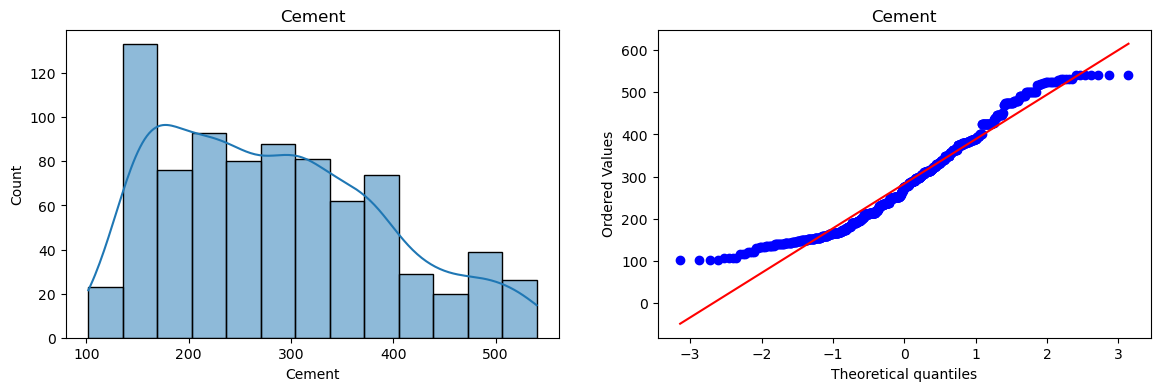

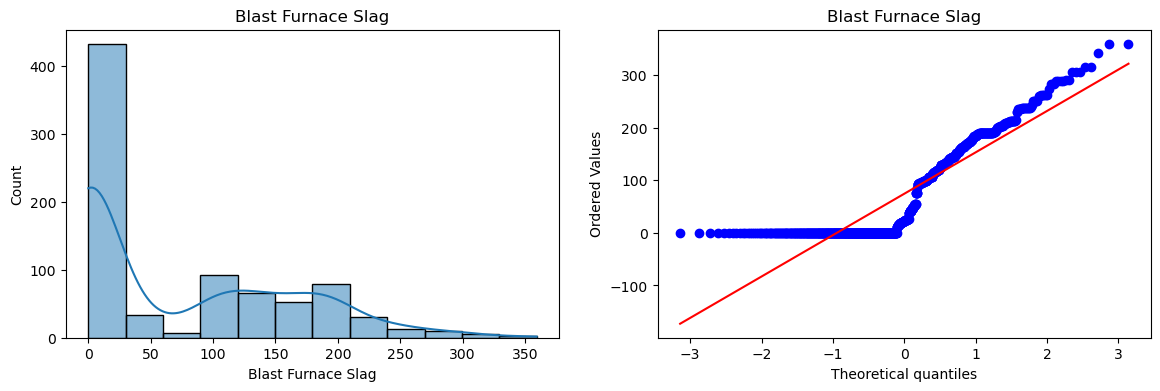

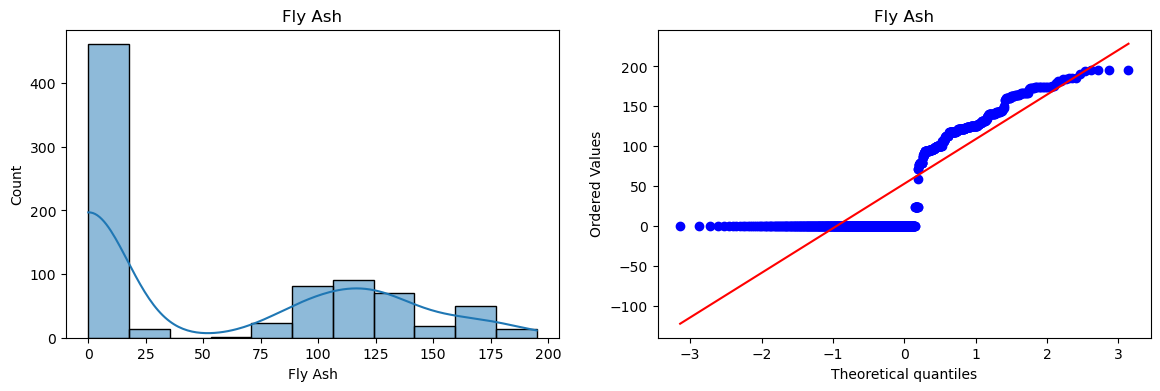

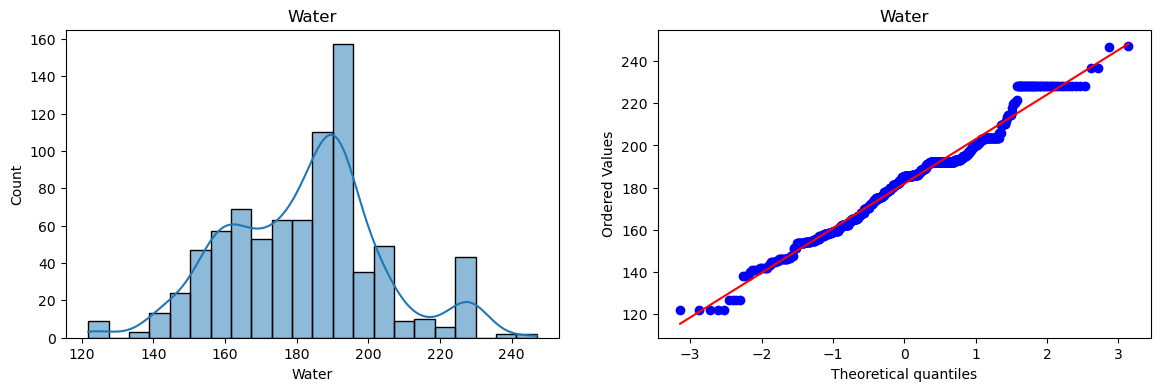

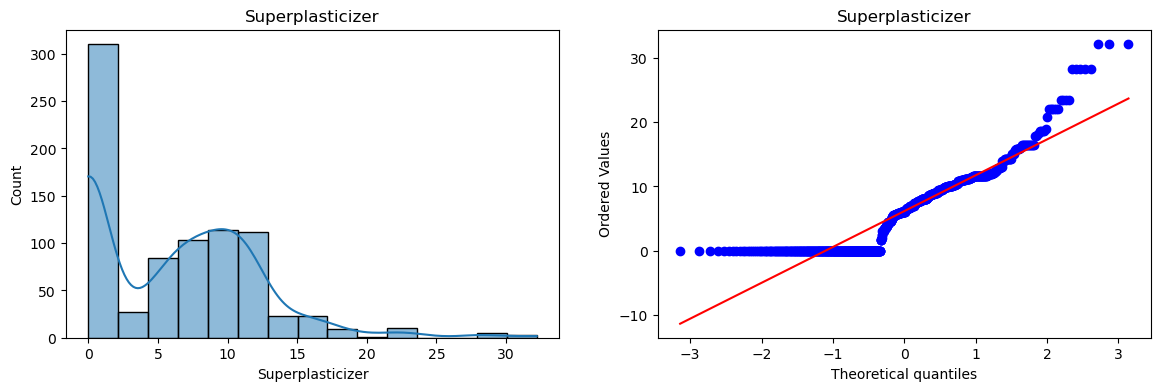

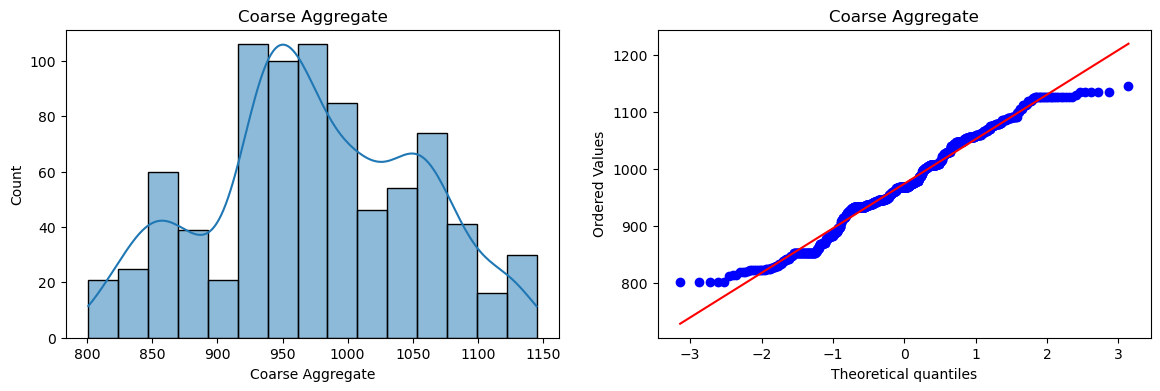

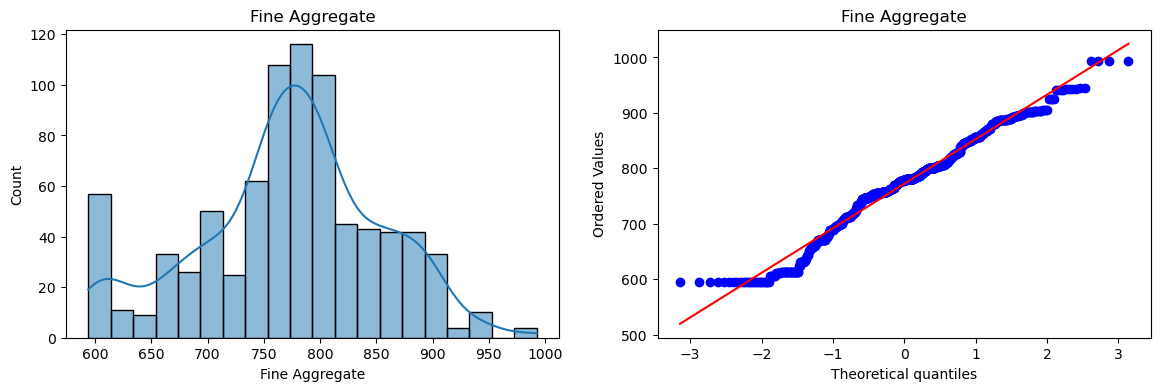

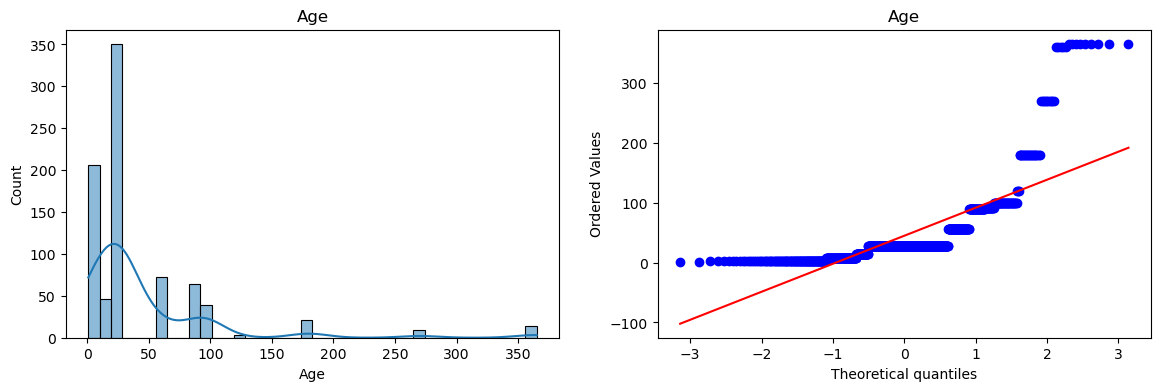

In [22]:
for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col] , kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col] , dist = "norm" , plot = plt)
    plt.title(col)
    plt.show()
    